
# Project: Investigate a Dataset - [NO-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
<li><a href="#intro">ScheduledDay’ tells us on what day the patient set up their appointment.</a></li>
<li><a href="#wrangling">'Neighborhood' indicates the location of the hospital.</a></li>
<li><a href="#eda">'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</a></li>
<li><a href="#conclusions">Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</a></li>
</ul>


### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [67]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01   25% |████████                        | 2.6MB 27.5MB/s eta 0:00:01    38% |████████████▏                   | 4.0MB 30.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01  4% |█▍                              | 573kB 26.9MB/s eta 0:00:01    14% |████▋                           | 1.9MB 26.2MB/s eta 0:00:01    90% |████████████████████████████▉   | 12.1MB 26.8MB/s eta 0:00:01    99% |███████████████████████████████▉| 13.3MB 26.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [70]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [72]:
#check for duplications
df.duplicated().sum()

0

there are no duplicated date

In [73]:
#check if  patient have many appoinments or not
df['PatientId'].nunique()

62299

just 62299 are unique values 

In [74]:
#check the number of duplicated patientsID
df['PatientId'].duplicated().sum()

48228

there are 48228 duplicated ID

In [75]:
#check the number of dupicated patients IDs and no_show 
#and we will remove this date in step of cleaning data
df.duplicated(['PatientId','No-show']).sum()

38710

there are 38710 patients have the same status of showing we will remove it to clean our data

In [76]:
#to check datatypes for each row and is there null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


NO MISSING VALUES

In [77]:
#getting some infromations about our date use describe() functions
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


by showing our data we noticed min age is (-1) which is not accepted and we will remove it in step of cleaning data

In [78]:
#check how many rows have 'age = -1'
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [79]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [80]:
#remove the -1 value from age column 
df.drop(index=99832,inplace=True)

In [81]:
#check if this row removed or not
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [82]:
#this step to correction name of 'Hipertention' column
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [83]:
#removing duplicated patients IDs with duplicated showing status as we show above 
#but patient IDs with different is showing status we will not remove it 
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.shape

(71816, 14)

after above step our data consist from 71816 instead of 110527

In [84]:
#removing unnecassary data 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 10 columns):
Gender           71816 non-null object
Age              71816 non-null int64
Neighbourhood    71816 non-null object
Scholarship      71816 non-null int64
Hypertension     71816 non-null int64
Diabetes         71816 non-null int64
Alcoholism       71816 non-null int64
Handcap          71816 non-null int64
SMS_received     71816 non-null int64
No-show          71816 non-null object
dtypes: int64(7), object(3)
memory usage: 6.0+ MB


## Data wrangling and cleaning summary
after getting data from csv file we show the first 5 rows to know general idea about our data,then check the dimentions of data that was **'110527'** row and after handling with duplicated data such that exist in **patient_id and showing status** ,missing data ,and negative date such as in age column and remove unnecassry coulumn as mentioned above ,finally our date became consist from just **71816** row and **10** column.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



### First Historams to Know more about our date

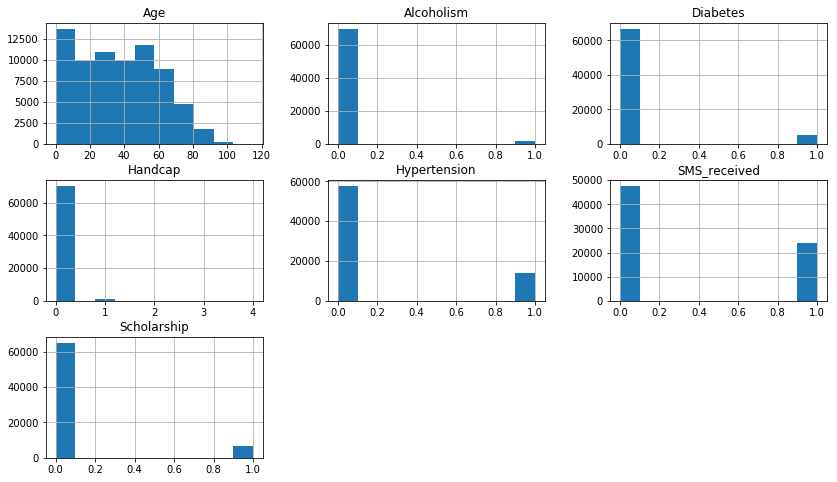

In [86]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(14,8));

In [87]:
#divide our patients to 2 groups to showing or not 
show=df['No-show']=='No'
no_show=df['No-show']=='Yes'
df[show].count(),df[no_show].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No-show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No-show          17663
 dtype: int64)

Number of showed patients is 54153 and the patients no showed is 17663 

In [88]:
df[show].mean(),df[no_show].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for showed patients is 37 and no showed is 34 

# Investigation Step

## Question 1 (does age affect on show or no_show ?)

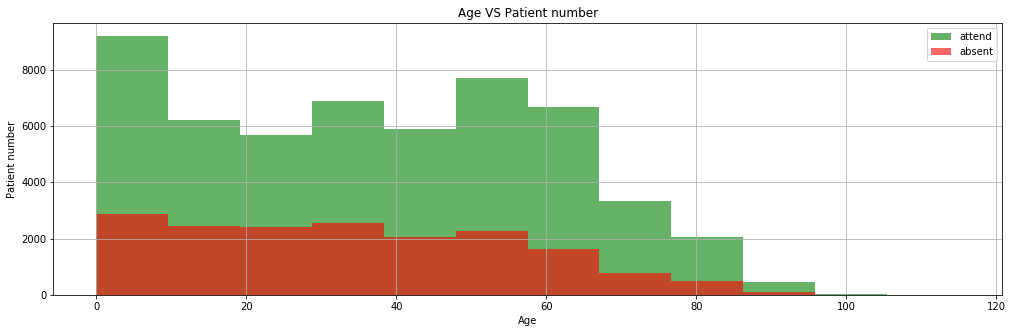

In [89]:
def fun(df ,column_name ,show ,no_show):
    plt.figure(figsize=[17,5])
    df[column_name][show].hist(alpha=0.6 ,bins=12,color='green',label='attend')
    df[column_name][no_show].hist(alpha=0.6 ,bins=12,color='red',label='absent')
    plt.legend();
    plt.title('Age VS Patient number')
    plt.xlabel('Age')
    plt.ylabel('Patient number')
fun(df,'Age',show,no_show)


From above figrue we will notice age from 0:10 are the most showing then the number of attendees is reduced till 45 age ,then the number of attendees increases from 45 : 58 the decrease to end of histogram .  

## Question 2 (Relationship between age and chronic diseases(Hypertension and Diabetes)?)

Text(0,0.5,'Mean Age')

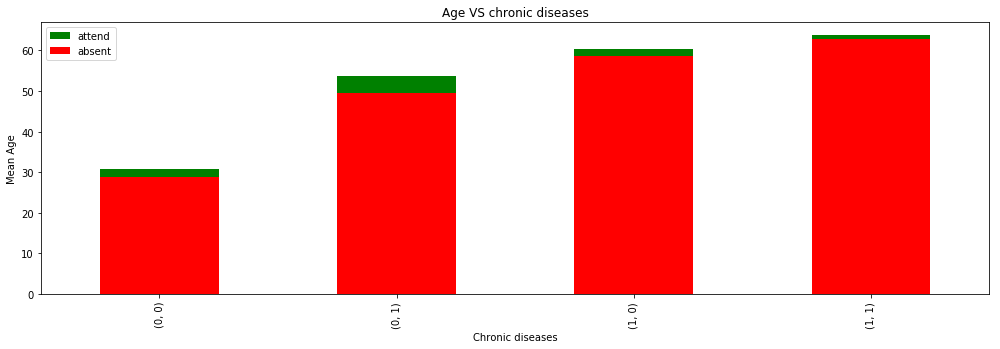

In [90]:
plt.figure(figsize=[17,5])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='green',label='attend')
df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='absent')
plt.legend();
plt.title('Age VS chronic diseases')
plt.xlabel('Chronic diseases')
plt.ylabel('Mean Age')

<ul>
<li><a href="#intro">(0 , 0) -> NO Hypertension ,No Diabetes</a></li>
<li><a href="#wrangling">(1 , 0) -> Hypertension ,No Diabetes</a></li>
<li><a href="#eda">(0 , 1) -> NO Hypertension ,Diabetes</a></li>
<li><a href="#conclusions">(1 , 1) -> Hypertension and Diabetes</a></li>
</ul>

we will notice from above histogram that no relationship between chronic diseases and attendence

## Question 3 (does Gender affect on show or no_show ?))

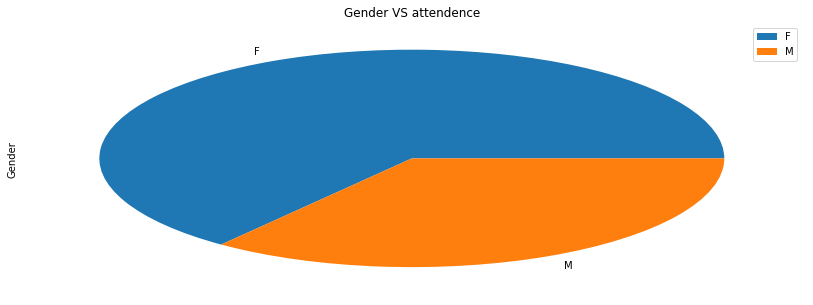

In [91]:
def fun(df ,column_name ,show ,no_show):
    plt.figure(figsize=[14,5])
    df[column_name][show].value_counts(normalize=True).plot(kind='pie')
    plt.legend();
    plt.title('Gender VS attendence')
fun(df,'Gender',show,no_show)

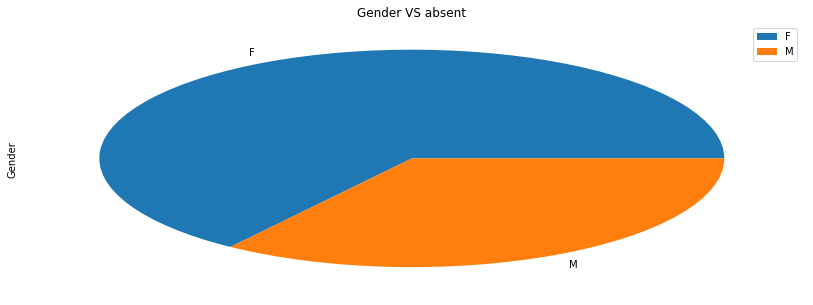

In [92]:
def fun(df ,column_name ,show ,no_show):
    plt.figure(figsize=[14,5])
    df[column_name][no_show].value_counts(normalize=True).plot(kind='pie')
    plt.legend();
    plt.title('Gender VS absent')
fun(df,'Gender',show,no_show)

as per to '2 pie chart' above Gender don't affect of showing or no showing

## Question 4(does SMS  affect on show or no_show ?))

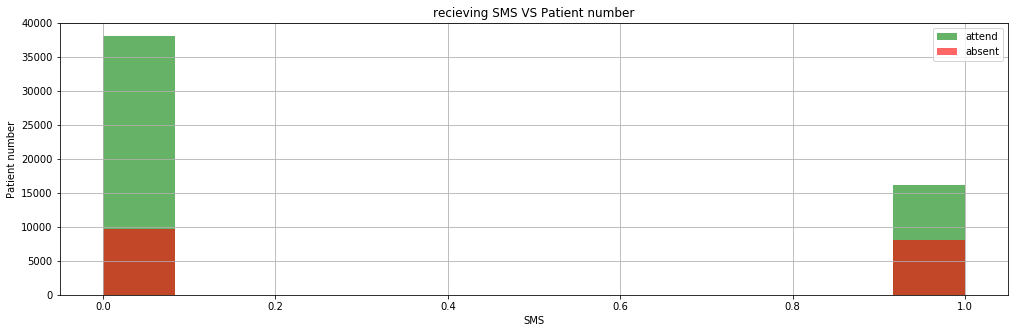

In [93]:
def fun(df ,column_name ,show ,no_show):
    plt.figure(figsize=[17,5])
    df[column_name][show].hist(alpha=0.6 ,bins=12,color='green',label='attend')
    df[column_name][no_show].hist(alpha=0.6 ,bins=12,color='red',label='absent')
    plt.legend();
    plt.title('recieving SMS VS Patient number')
    plt.xlabel('SMS')
    plt.ylabel('Patient number')
fun(df,'SMS_received',show,no_show)


we will notice as per above histogram Number of patient that attend without recieving sms is greater than patient that recieve sms . 

   ## Question 4(Does Neighbourhood  affect on show or no_show ?))

Text(0,0.5,'Patient number')

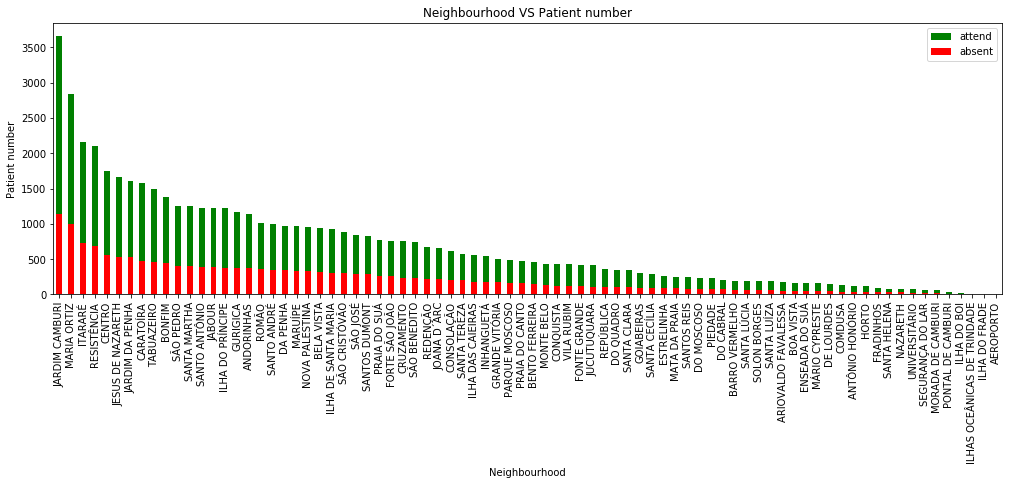

In [94]:
plt.figure(figsize=[17,5])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='green',label='attend')
df.Neighbourhood[no_show].value_counts().plot(kind='bar',color='red',label='absent')
plt.legend();
plt.title('Neighbourhood VS Patient number')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient number')

as per above histogram Neighbourhood has a strong affect of showing and no showing.

   ## Question 4(Relationship between Neighbourhood and mean age ?))

Text(0,0.5,'Mean Age')

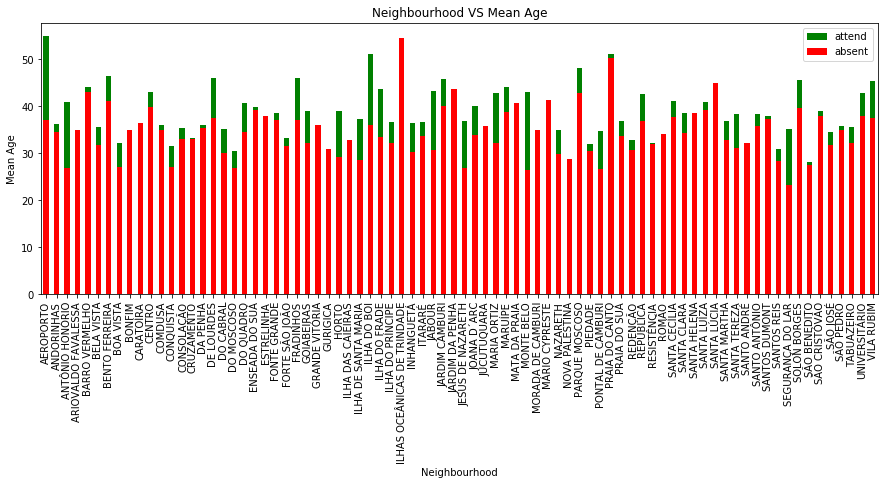

In [95]:
plt.figure(figsize=[15,5])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='green',label='attend')
df[no_show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='red',label='absent')
plt.legend();
plt.title('Neighbourhood VS Mean Age')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Age')

Text(0,0.5,'patient number')

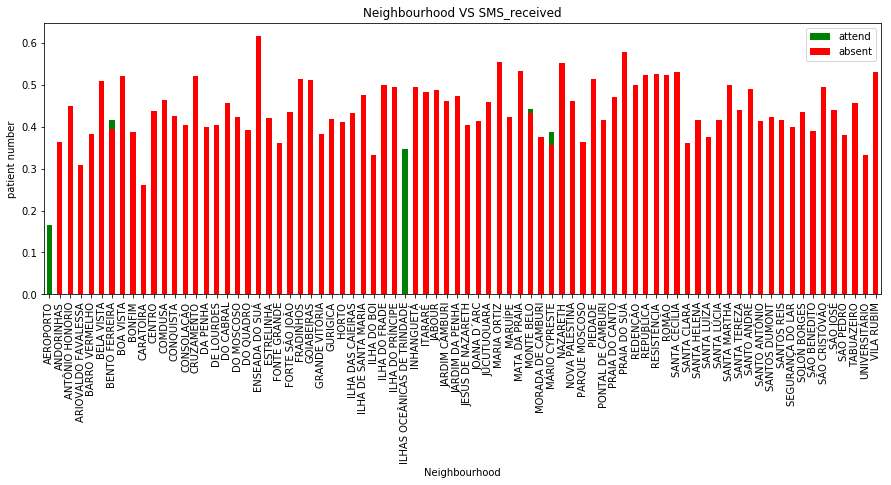

In [96]:
plt.figure(figsize=[15,5])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='green',label='attend')
df[no_show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='absent')
plt.legend();
plt.title('Neighbourhood VS SMS_received')
plt.xlabel('Neighbourhood')
plt.ylabel('patient number')

SMS_received is have a response in only 5 neighbourhoods

<a id='conclusions'></a>
## Conclusions

<ul>
<li><a href="#eda" -> age from 0:10 is the most showing </a></li>
<li><a href="#eda") -> age from 10:45  the showing is reducing </a></li>
    <li><a href="#eda" -> age from 45:58  the showing is increasing  </a></li>
<li><a href="#intro" -> Neighbourhood has a strong effect on showing or not showing</a></li>
<li><a href="#wrangling" -> Number of showing from specific of Neighbourhood affect by receiving sms and ages </a></li>
<li><a href="#conclusions" -> we will notice as per above histogram Number of patient that attend without recieving sms is greater than patient that recieve sms .</a></li>
</ul>

## Limitations
No clear relationship between showing and gender ,showing and chronic diseases ,showing and welfare programm


In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0